In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("fake_reg.csv")

In [3]:
data.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [5]:
data.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


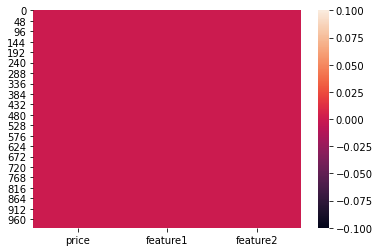

In [6]:
sns.heatmap(data.isnull())

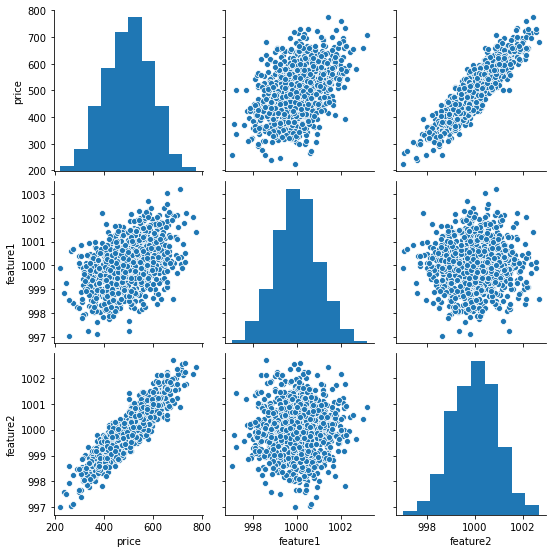

In [7]:
sns.pairplot(data)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = data[['feature1','feature2']].values
y = data['price'].values

In [10]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [11]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scalar = MinMaxScaler()

In [15]:
scalar.fit(X_train)

MinMaxScaler()

In [16]:
X_train = scalar.transform(X_train)

In [17]:
X_train.shape

(700, 2)

In [18]:
X_test = scalar.transform(X_test)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
help(Dense)

Help on class Dense in module tensorflow.python.keras.layers.core:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 1 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along axis 2 of the `input`, on every sub-tensor

In [21]:
#first method for making model
model = Sequential([Dense(4,activation='relu'),
                   Dense(2,activation='relu'),
                   Dense(1)])

In [22]:
#Second method for making model
model = Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
#final layer 1 because we want 1 output 'price'(its also called output layer)
model.add(Dense(1))
#loss changed according to prediction colume(Regression,binary or multi-class)
model.compile(optimizer='rmsprop',loss='mse')

In [23]:
model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 2s 661us/step - loss: 251898.4226
Epoch 2/250
22/22 [==============================] - 0s 715us/step - loss: 252120.7806
Epoch 3/250
22/22 [==============================] - 0s 666us/step - loss: 258702.7867
Epoch 4/250
22/22 [==============================] - 0s 810us/step - loss: 257789.0516
Epoch 5/250
22/22 [==============================] - 0s 809us/step - loss: 250658.6413
Epoch 6/250
22/22 [==============================] - 0s 714us/step - loss: 253866.3084
Epoch 7/250
22/22 [==============================] - 0s 714us/step - loss: 255223.7874
Epoch 8/250
22/22 [==============================] - 0s 714us/step - loss: 257135.7534
Epoch 9/250
22/22 [==============================] - 0s 762us/step - loss: 253402.5557
Epoch 10/250
22/22 [==============================] - 0s 666us/step - loss: 254566.0245
Epoch 11/250
22/22 [==============================] - 0s 714us/step - loss: 255771.7887
Epoch 12/250
22/22 [=====================

22/22 [==============================] - 0s 714us/step - loss: 2772.1055
Epoch 95/250
22/22 [==============================] - 0s 571us/step - loss: 2242.0789
Epoch 96/250
22/22 [==============================] - 0s 762us/step - loss: 2098.5004
Epoch 97/250
22/22 [==============================] - 0s 666us/step - loss: 1968.3252
Epoch 98/250
22/22 [==============================] - 0s 761us/step - loss: 1955.4686
Epoch 99/250
22/22 [==============================] - 0s 762us/step - loss: 1821.2652
Epoch 100/250
22/22 [==============================] - 0s 666us/step - loss: 1814.2393
Epoch 101/250
22/22 [==============================] - 0s 761us/step - loss: 1910.0365
Epoch 102/250
22/22 [==============================] - 0s 666us/step - loss: 1756.6820
Epoch 103/250
22/22 [==============================] - 0s 761us/step - loss: 1689.4332
Epoch 104/250
22/22 [==============================] - 0s 619us/step - loss: 1703.3152
Epoch 105/250
22/22 [==============================] - 0s 714u

22/22 [==============================] - 0s 619us/step - loss: 99.7647
Epoch 190/250
22/22 [==============================] - 0s 571us/step - loss: 98.7789
Epoch 191/250
22/22 [==============================] - 0s 618us/step - loss: 101.0871
Epoch 192/250
22/22 [==============================] - 0s 619us/step - loss: 99.4591
Epoch 193/250
22/22 [==============================] - 0s 619us/step - loss: 84.1054
Epoch 194/250
22/22 [==============================] - 0s 666us/step - loss: 74.0760
Epoch 195/250
22/22 [==============================] - 0s 619us/step - loss: 74.9439
Epoch 196/250
22/22 [==============================] - 0s 571us/step - loss: 66.1571
Epoch 197/250
22/22 [==============================] - 0s 571us/step - loss: 62.8585
Epoch 198/250
22/22 [==============================] - 0s 666us/step - loss: 60.0723
Epoch 199/250
22/22 [==============================] - 0s 571us/step - loss: 52.3672
Epoch 200/250
22/22 [==============================] - 0s 571us/step - loss: 5

In [24]:
loss_data = pd.DataFrame(model.history.history)

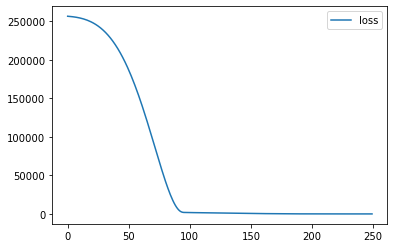

In [25]:
loss_data.plot()

In [26]:
model.evaluate(X_test,y_test,verbose=0)

26.111854553222656

In [27]:
model.evaluate(X_train,y_train,verbose=0)

24.135013580322266

In [28]:
test_pred = model.predict(X_test)

In [29]:
test_pred

array([[406.1129 ],
       [624.6656 ],
       [593.20264],
       [573.30743],
       [367.4367 ],
       [580.25134],
       [516.07733],
       [459.98578],
       [550.29364],
       [448.3779 ],
       [612.8943 ],
       [549.9183 ],
       [419.94617],
       [409.70984],
       [652.35376],
       [438.15283],
       [509.37695],
       [661.1514 ],
       [663.7825 ],
       [566.56305],
       [334.97833],
       [445.7152 ],
       [383.33734],
       [379.5393 ],
       [567.646  ],
       [611.7269 ],
       [533.39813],
       [428.71024],
       [656.6447 ],
       [414.89734],
       [443.492  ],
       [486.062  ],
       [439.28003],
       [683.0785 ],
       [425.57535],
       [418.54822],
       [502.83105],
       [551.4962 ],
       [510.74084],
       [396.21484],
       [619.6996 ],
       [417.45285],
       [605.5401 ],
       [446.8042 ],
       [502.94785],
       [582.7294 ],
       [670.1501 ],
       [491.32483],
       [319.25928],
       [486.36688],


In [30]:
test_pred = pd.Series(test_pred.reshape(300,))

In [31]:
test_pred

0      406.112915
1      624.665588
2      593.202637
3      573.307434
4      367.436707
          ...    
295    530.062500
296    516.389893
297    610.752686
298    417.770630
299    411.726135
Length: 300, dtype: float32

In [32]:
pred_data = pd.DataFrame(y_test,columns=['Test True Y'])

In [33]:
pred_data

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [34]:
pred_data = pd.concat([pred_data,test_pred],axis=1)

In [35]:
pred_data.columns = ['Test True Y','Predicted Y']

In [36]:
pred_data

,Test True Y,Predicted Y
0,402.296319,406.112915
1,624.156198,624.665588
2,582.455066,593.202637
3,578.588606,573.307434
4,371.224104,367.436707
...,...,...
295,525.704657,530.062500
296,502.909473,516.389893
297,612.727910,610.752686
298,417.569725,417.770630


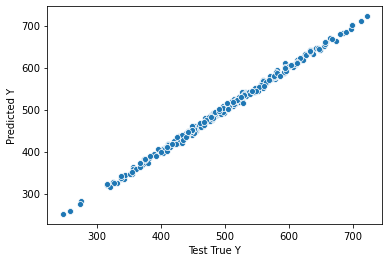

In [37]:
sns.scatterplot(x='Test True Y',y='Predicted Y',data=pred_data)

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [39]:
mean_absolute_error(pred_data['Test True Y'],pred_data['Predicted Y'])

4.136447047109966

In [40]:
mean_squared_error(pred_data['Test True Y'],pred_data['Predicted Y'])

26.1118522070801

In [41]:
#root mean square error
mean_squared_error(pred_data['Test True Y'],pred_data['Predicted Y'])**0.5

5.109975754059906

In [42]:
#making prediction by real world example gems
#let we ha two feature[998,1000]
new_gem = [[998,1000]]

In [43]:
#we train our model from scaled data So we need to scale it first
new_gem = scalar.transform(new_gem)

In [44]:
new_gem

array([[0.14117652, 0.53968792]])

In [45]:
pred = model.predict(new_gem)

In [46]:
print('price of new_gem is :',pred)

price of new_gem is : [[420.57684]]


In [47]:
#some time our model is very big and it use alot time to train 
#So we can save it as "h5" file to load later by
from tensorflow.keras.models import load_model

In [48]:
model.save('my_gem NNModel.h5')

In [49]:
#to load it
later_model = load_model('my_gem NNModel.h5')

In [50]:
later_model.predict(new_gem)

array([[420.57684]], dtype=float32)

TF Regression

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns

In [52]:
data = pd.read_csv('kc_house_data.csv')

In [53]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [55]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


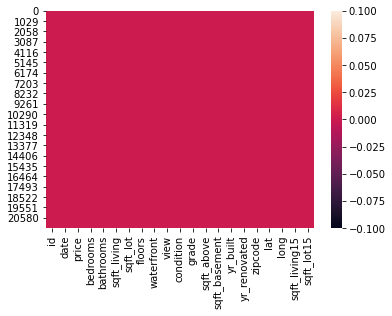

In [56]:
sns.heatmap(data.isnull())

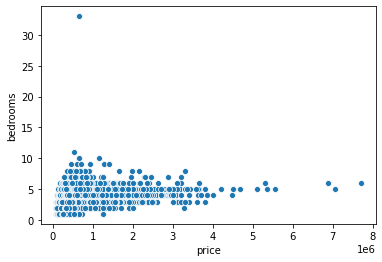

In [57]:
sns.scatterplot(x='price',y='bedrooms',data=data)

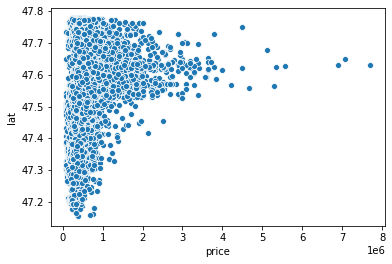

In [58]:
sns.scatterplot(x='price',y='lat',data=data)

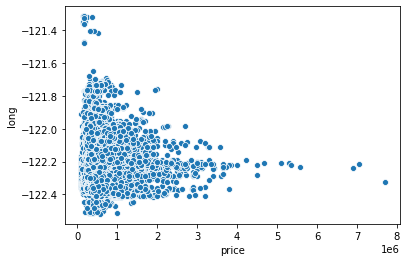

In [59]:
sns.scatterplot(x='price',y='long',data=data)

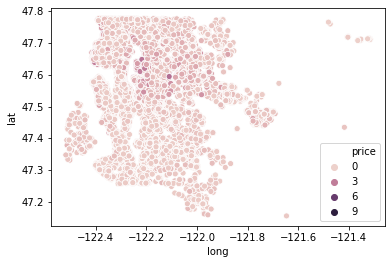

In [60]:
sns.scatterplot(x='long',y='lat',data=data,hue='price')

In [61]:
data.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


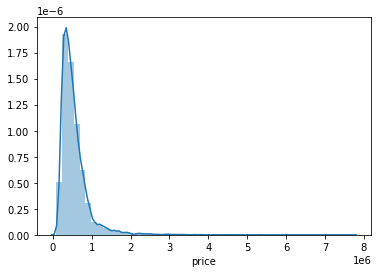

In [62]:
sns.distplot(data['price'])

In [63]:
#one persent of data
len(data)*0.01

215.97

In [64]:
without_top_one_p = data.sort_values('price',ascending=False).iloc[206:]

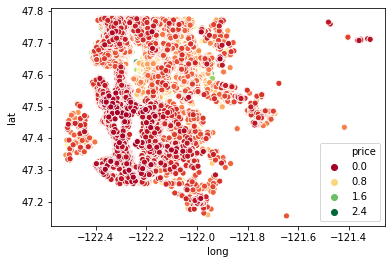

In [65]:
sns.scatterplot(x='long',y='lat',data=without_top_one_p,palette='RdYlGn',hue='price')

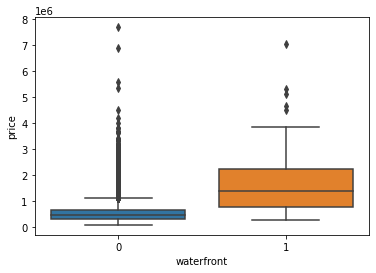

In [66]:
sns.boxplot(x='waterfront',y='price',data=data)

In [67]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [68]:
data['date'] = pd.to_datetime(data['date'])

In [69]:
data['month'] = data['date'].apply(lambda date: date.month)
data['year'] = data['date'].apply(lambda date: date.year)

In [70]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


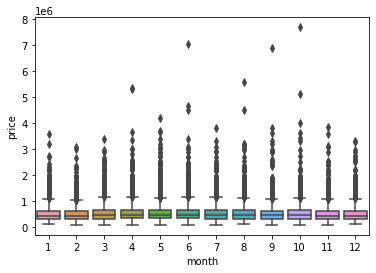

In [71]:
sns.boxplot(x='month',y='price',data=data)

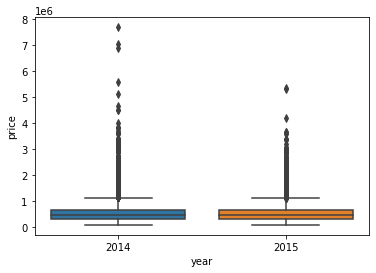

In [72]:
sns.boxplot(x='year',y='price',data=data)

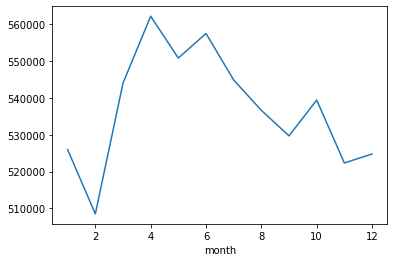

In [73]:
data.groupby('month').mean()['price'].plot()

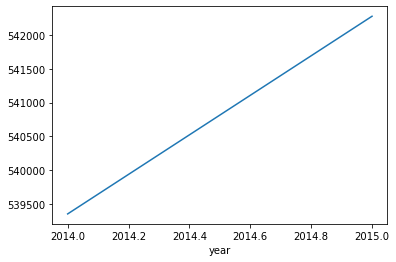

In [74]:
data.groupby('year').mean()['price'].plot()

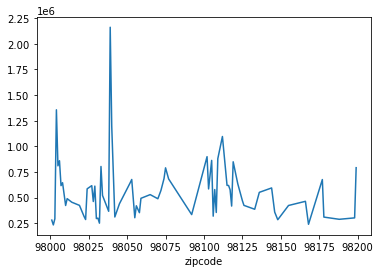

In [75]:
#theres alot of disterbence(up and down) so it is not related to price So, we need to drop it
data.groupby('zipcode').mean()['price'].plot()

In [76]:
data = data.drop('zipcode',axis=1)

In [77]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

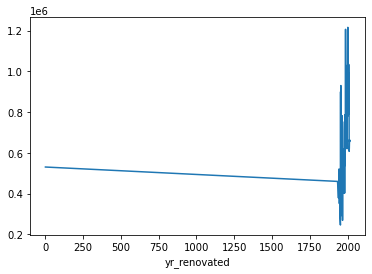

In [78]:
data.groupby('yr_renovated').mean()['price'].plot()

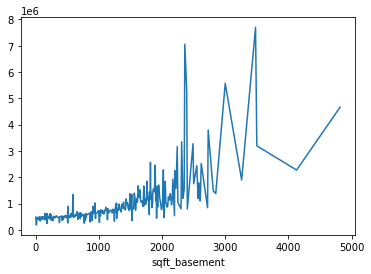

In [79]:
data.groupby('sqft_basement').mean()['price'].plot()

In [80]:
data = data.drop("date",axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [81]:
X = data.drop("price",axis=1).values
y = data['price'].values

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scaler = MinMaxScaler()

In [86]:
X_train = scaler.fit_transform(X_train)

In [87]:
X_test = scaler.transform(X_test)

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [89]:
data.shape

(21597, 21)

In [90]:
#Second method for making model
model = Sequential()
model.add(Dense(21,activation='relu'))
model.add(Dense(21,activation='relu'))
model.add(Dense(21,activation='relu'))
#final layer 1 because we want 1 output 'price'(its also called output layer)
model.add(Dense(1))
#loss changed according to prediction colume(Regression,binary or multi-class)
model.compile(optimizer='adam',loss='mse')

In [91]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 2s 12ms/step - loss: 422233170193.0667 - val_loss: 418952937472.0000
Epoch 2/400
119/119 [==============================] - 0s 1ms/step - loss: 426421041288.5333 - val_loss: 418263236608.0000
Epoch 3/400
119/119 [==============================] - 0s 1ms/step - loss: 419959107584.0000 - val_loss: 414536040448.0000
Epoch 4/400
119/119 [==============================] - 0s 1ms/step - loss: 414950338833.0667 - val_loss: 403763331072.0000
Epoch 5/400
119/119 [==============================] - 0s 1ms/step - loss: 401194560989.8666 - val_loss: 381509959680.0000
Epoch 6/400
119/119 [==============================] - 0s 1ms/step - loss: 371357511406.9333 - val_loss: 344484806656.0000
Epoch 7/400
119/119 [==============================] - 0s 1ms/step - loss: 337146975573.3333 - val_loss: 293238734848.0000
Epoch 8/400
119/119 [==============================] - 0s 1ms/step - loss: 273246931217.0667 - val_loss: 233174679552.0000
Epoch 9/400
119

Epoch 68/400
119/119 [==============================] - 0s 1ms/step - loss: 44780419345.0667 - val_loss: 48228335616.0000
Epoch 69/400
119/119 [==============================] - 0s 1ms/step - loss: 50926584934.4000 - val_loss: 47944732672.0000
Epoch 70/400
119/119 [==============================] - 0s 1ms/step - loss: 44923674043.7333 - val_loss: 47723433984.0000
Epoch 71/400
119/119 [==============================] - 0s 1ms/step - loss: 44533863219.2000 - val_loss: 47484178432.0000
Epoch 72/400
119/119 [==============================] - 0s 1ms/step - loss: 50273287987.2000 - val_loss: 47251722240.0000
Epoch 73/400
119/119 [==============================] - 0s 1ms/step - loss: 47435401489.0667 - val_loss: 47031476224.0000
Epoch 74/400
119/119 [==============================] - 0s 1ms/step - loss: 46544913442.1333 - val_loss: 46832660480.0000
Epoch 75/400
119/119 [==============================] - 0s 1ms/step - loss: 49233382980.2667 - val_loss: 46641639424.0000
Epoch 76/400
119/119 [==

Epoch 135/400
119/119 [==============================] - 0s 1ms/step - loss: 40192194935.4667 - val_loss: 38391717888.0000
Epoch 136/400
119/119 [==============================] - 0s 1ms/step - loss: 37463678071.4667 - val_loss: 38313598976.0000
Epoch 137/400
119/119 [==============================] - 0s 1ms/step - loss: 38730470894.9333 - val_loss: 38231244800.0000
Epoch 138/400
119/119 [==============================] - 0s 1ms/step - loss: 38417574195.2000 - val_loss: 38147219456.0000
Epoch 139/400
119/119 [==============================] - 0s 1ms/step - loss: 37182448059.7333 - val_loss: 38088777728.0000
Epoch 140/400
119/119 [==============================] - 0s 1ms/step - loss: 39746956936.5333 - val_loss: 37979418624.0000
Epoch 141/400
119/119 [==============================] - 0s 1ms/step - loss: 38397164748.8000 - val_loss: 37895733248.0000
Epoch 142/400
119/119 [==============================] - 0s 1ms/step - loss: 42864506675.2000 - val_loss: 37814263808.0000
Epoch 143/400
11

119/119 [==============================] - 0s 1ms/step - loss: 34415529659.7333 - val_loss: 34174437376.0000
Epoch 202/400
119/119 [==============================] - 0s 1ms/step - loss: 36352004710.4000 - val_loss: 34132621312.0000
Epoch 203/400
119/119 [==============================] - 0s 1ms/step - loss: 35440254515.2000 - val_loss: 34098499584.0000
Epoch 204/400
119/119 [==============================] - 0s 1ms/step - loss: 34905301435.7333 - val_loss: 34061785088.0000
Epoch 205/400
119/119 [==============================] - 0s 1ms/step - loss: 34693421738.6667 - val_loss: 34042787840.0000
Epoch 206/400
119/119 [==============================] - 0s 1ms/step - loss: 35540711645.8667 - val_loss: 34016077824.0000
Epoch 207/400
119/119 [==============================] - 0s 1ms/step - loss: 36892934041.6000 - val_loss: 33967493120.0000
Epoch 208/400
119/119 [==============================] - 0s 1ms/step - loss: 36175991637.3333 - val_loss: 33946155008.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 32429822754.1333 - val_loss: 32415035392.0000
Epoch 268/400
119/119 [==============================] - 0s 1ms/step - loss: 34994119765.3333 - val_loss: 32384727040.0000
Epoch 269/400
119/119 [==============================] - 0s 1ms/step - loss: 34192458137.6000 - val_loss: 32366237696.0000
Epoch 270/400
119/119 [==============================] - 0s 1ms/step - loss: 33589207091.2000 - val_loss: 32346949632.0000
Epoch 271/400
119/119 [==============================] - 0s 1ms/step - loss: 33889921501.8667 - val_loss: 32324198400.0000
Epoch 272/400
119/119 [==============================] - 0s 1ms/step - loss: 32817390148.2667 - val_loss: 32308746240.0000
Epoch 273/400
119/119 [==============================] - 0s 1ms/step - loss: 33651321514.6667 - val_loss: 32291434496.0000
Epoch 274/400
119/119 [==============================] - 0s 1ms/step - loss: 34684040465.0667 - val_loss: 32296630272.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 33547497574.4000 - val_loss: 31268157440.0000
Epoch 334/400
119/119 [==============================] - 0s 1ms/step - loss: 33478382284.8000 - val_loss: 31244138496.0000
Epoch 335/400
119/119 [==============================] - 0s 1ms/step - loss: 32060385638.4000 - val_loss: 31293331456.0000
Epoch 336/400
119/119 [==============================] - 0s 1ms/step - loss: 32509175142.4000 - val_loss: 31223693312.0000
Epoch 337/400
119/119 [==============================] - 0s 1ms/step - loss: 32913183505.0667 - val_loss: 31212883968.0000
Epoch 338/400
119/119 [==============================] - 0s 1ms/step - loss: 33050469563.7333 - val_loss: 31196858368.0000
Epoch 339/400
119/119 [==============================] - 0s 1ms/step - loss: 31654196275.2000 - val_loss: 31171164160.0000
Epoch 340/400
119/119 [==============================] - 0s 1ms/step - loss: 32441588872.5333 - val_loss: 31157291008.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 31542796782.9333 - val_loss: 30452271104.0000
Epoch 400/400
119/119 [==============================] - 0s 1ms/step - loss: 31868423441.0667 - val_loss: 30445047808.0000


In [92]:
loss = pd.DataFrame(model.history.history)

In [94]:
loss

,loss,val_loss
0,4.302438e+11,4.189529e+11
1,4.299951e+11,4.182632e+11
2,4.280658e+11,4.145360e+11
3,4.211487e+11,4.037633e+11
4,4.048987e+11,3.815100e+11
...,...,...
395,3.193394e+10,3.050940e+10
396,3.192829e+10,3.051083e+10
397,3.194348e+10,3.047721e+10
398,3.189725e+10,3.045227e+10


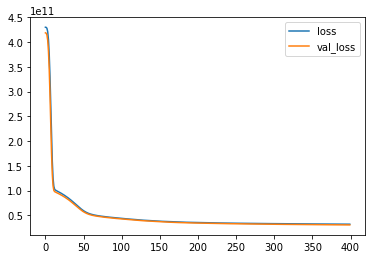

In [93]:
loss.plot()

In [95]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [96]:
predictions = model.predict(X_test)

In [98]:
np.sqrt(mean_squared_error(y_test,predictions))

174485.10844272838

In [99]:
mean_absolute_error(y_test,predictions)

106994.37734972165

In [100]:
data['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [101]:
#average house price
5.402966e+05

540296.6

In [107]:
explained_variance_score(y_test,predictions)

0.7704293970524309

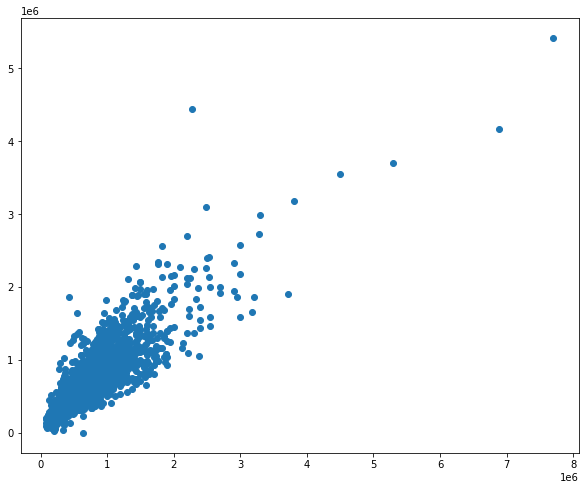

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.scatter(y_test,predictions)

In [109]:
single_house = data.drop('price',axis=1).iloc[0]

In [110]:
single_house

id               7.129301e+09
bedrooms         3.000000e+00
bathrooms        1.000000e+00
sqft_living      1.180000e+03
sqft_lot         5.650000e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            7.000000e+00
sqft_above       1.180000e+03
sqft_basement    0.000000e+00
yr_built         1.955000e+03
yr_renovated     0.000000e+00
lat              4.751120e+01
long            -1.222570e+02
sqft_living15    1.340000e+03
sqft_lot15       5.650000e+03
month            1.000000e+01
year             2.014000e+03
Name: 0, dtype: float64

In [112]:
single_house  = scaler.transform(single_house.values.reshape(-1,20))

In [113]:
single_house

array([[0.72432505, 0.2       , 0.08      , 0.08376422, 0.00310751,
        0.        , 0.        , 0.        , 0.5       , 0.4       ,
        0.10785619, 0.        , 0.47826087, 0.        , 0.57149751,
        0.21760797, 0.16193426, 0.00582059, 0.81818182, 0.        ]])

In [114]:
model.predict(single_house)

array([[291443.1]], dtype=float32)

In [117]:
data.head(1)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,7129300520,221900.0,3,1.0,1180,5650,1.0,0,0,3,...,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
